# Reporting on sales data


## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

In [29]:
# Importing the necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

from datetime import datetime



In [30]:
# Reading in the sales data
sales_df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
sales_df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


### First, the given is explored in the code cells below

In [31]:
# Exploring the data to check if there are missing values:
sales_df.isnull().sum()


date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [32]:
# Exploring the data to confirm the data types:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [33]:
#Extracting all the column headings in a list
sales_df.columns.to_list()

['date',
 'warehouse',
 'client_type',
 'product_line',
 'quantity',
 'unit_price',
 'total',
 'payment']

In [34]:
## Exploring the data to understand the product lines
sales_df['product_line'].unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [35]:
## Exploring the data to understand the payment methods
sales_df['payment'].unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

In [36]:
# Checking the overall statistical analysis of the data
sales_df.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


### Insights:
- The data has 1000 enteries with each column with correct data types and no null values.
- There are 6 product lines: 
- There are 3 payment methods: credit card, cash, and transfer
- There are 2 client types:  retail and wholesales

### Q1. What are the total sales for each payment method?

In [37]:
sales_pymntmtd = sales_df.groupby('payment')['total'].sum().sort_values(ascending = False).reset_index()
sales_pymntmtd

,payment,total
0,Transfer,159642.33
1,Credit card,110271.57
2,Cash,19199.10


## Q2. What is the average unit price for each product line?

In [38]:
 sales_prdtline = sales_df.groupby('product_line')['unit_price'].mean().sort_values(ascending = False).reset_index()
 sales_prdtline

,product_line,unit_price
0,Engine,60.091803
1,Frame & body,42.832229
2,Suspension & traction,33.969868
3,Electrical system,25.585130
4,Miscellaneous,22.810738
5,Breaking system,17.740522


### Q3. Create plots to visualize findings for questions 1 and 2.

In [39]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


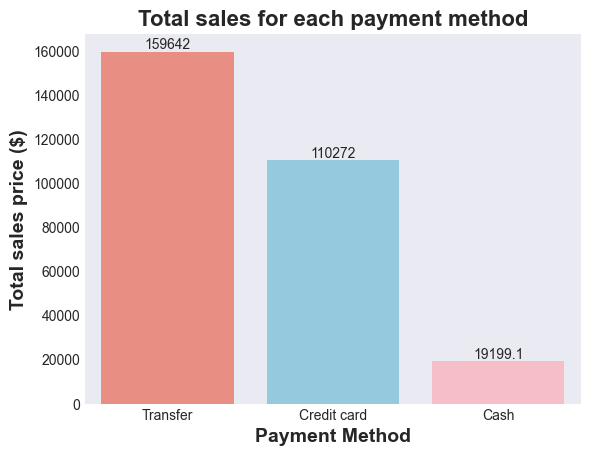

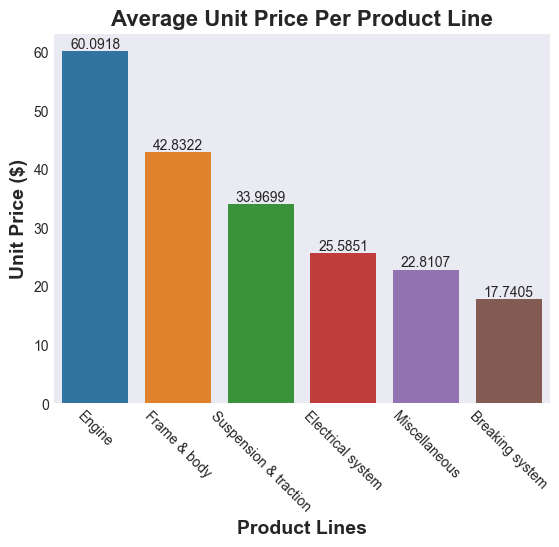

In [40]:
# Plotting barcharts:
plt.figure()
ax = sns.barplot (x ='payment',y= 'total', data = sales_pymntmtd, palette = ['salmon', 'skyblue', 'lightpink'] )
ax.bar_label(ax.containers[0])
plt.xlabel('Payment Method', fontsize = 14, fontweight = 'bold')
plt.ylabel('Total sales price ($)', fontsize = 14, fontweight = 'bold')
plt.title('Total sales for each payment method', fontsize = 16, fontweight = 'bold')
plt.show()

plt.figure()
ay = sns.barplot(x = 'product_line', y='unit_price', data = sales_prdtline)
ay.bar_label(ay.containers[0])
plt.xlabel('Product Lines', fontsize = 14, fontweight = 'bold')
plt.ylabel('Unit Price ($)', fontsize = 14, fontweight = 'bold')
plt.title('Average Unit Price Per Product Line', fontsize = 16, fontweight = 'bold')
plt.xticks (rotation = -45)

# plt.style.use('dark_background')

plt.show()

### Q4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)

In [41]:
avg_sales_clienttype = sales_df.groupby('client_type')['total'].mean().sort_values(ascending = False).reset_index()
avg_sales_clienttype

,client_type,total
0,Wholesale,709.521467
1,Retail,167.058929


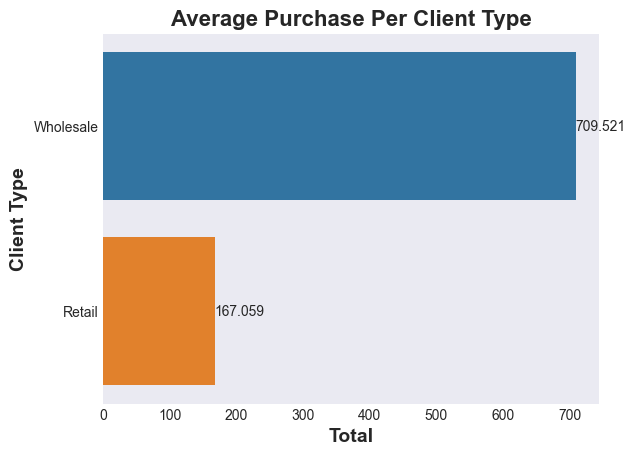

In [42]:
plt.figure()
ax = sns.barplot(x = 'total', y = 'client_type', data = avg_sales_clienttype)
ax.bar_label(ax.containers[0])
plt.xlabel('Total', fontsize = 14, fontweight = 'bold')
plt.ylabel('Client Type', fontsize = 14, fontweight = 'bold')
plt.title('Average Purchase Per Client Type', fontsize = 16, fontweight = 'bold')

plt.show()

In [43]:
avg_sales_prdt = sales_df.groupby('product_line')['total'].mean().sort_values(ascending = False).reset_index()
avg_sales_prdt

,product_line,total
0,Engine,622.055410
1,Frame & body,415.811627
2,Suspension & traction,320.237763
3,Electrical system,225.972591
4,Miscellaneous,222.670656
5,Breaking system,166.739783


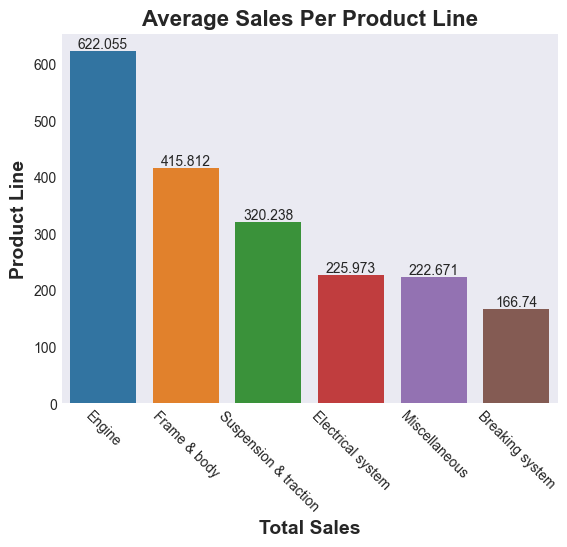

In [44]:
plt.figure()
ax = sns.barplot(x = 'product_line', y = 'total', data = avg_sales_prdt)
ax.bar_label(ax.containers[0])
plt.xlabel('Total Sales', fontsize = 14, fontweight = 'bold')
plt.ylabel('Product Line', fontsize = 14, fontweight = 'bold')
plt.title('Average Sales Per Product Line', fontsize = 16, fontweight = 'bold')
plt.style.use('seaborn-dark')
plt.xticks(rotation = -45)

plt.show()

### Q5. Summarize your findings


### The following are noted from the study:
- 1. The transfer payment method seemed to be the most preferred mode of payment as seen from the first bar chart. Since its value is higher than the other two payment methods combined, it is recommended that this mode of payment should be further strengthened to ensure clients satisfaction.
- 2. Given that the most expensive product line was the Engine product line, it was however unexpected that it would also be the most purchased product. This thereby implies that the product line is in high demand and necessary measures need to be put in place to harness maximum profit and also customer satisfaction.
- 3. Most of the goods are being purchased on a wholesale basis. Concerted efforts should be placed on this client type to ensure they have positive experience with the company.